# **PORTOFOLIO: STROKE PREDICTION?**
## **METHOD: CLASSIFICATION**

---

## **BUSINESS UNDERSTANDING**

From the health perspective, stroke is one of the major clinical events contributing to mortality and disability, and the protecting the life of humans from its impact is one of the major challenges. The stroke can drastically impact one’s way of life; however, the available health data can facilitate accurate prediction which can help cutting down the impact on human life. There is tremendous life value in prevention and there is equally life value for those who are already suffering if action is taken at the right time. This is achievable by synergizing the best health technologies with medical compass and focussing on enhancing health care predictive capabilities.

Assessment and anticipation of stroke risk for patients through health data feature analysis can improve health outcomes significantly. The stroke is hugely damaging, but its effects can be minimized by pro-actively managing health risks through early detection.  Moreover, the integration of sophisticated clinical analytics and clinical acumen focused on stroke risk assessment plays an indispensable role in effective patient allocation. In the end, predictive systems of anticipating health risks proactively stand to benefit not just the direct target group but also the healthcare system as a whole.



---

## **DATA UNDERSTANDING:**
## **STROKE PREDICTION DATASET**

[Click Here! Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

### **Knowing the Dataset?**

### Dataset Overview

| Column Name       | Description                                                                                     |
|-------------------|-------------------------------------------------------------------------------------------------|
| **id**            | Unique identifier for each patient.                                                            |
| **gender**        | Gender of the patient - "Male", "Female", or "Other".                                          |
| **age**           | Age of the patient.                                                                            |
| **hypertension**  | Indicates if the patient has hypertension - `0` (No) or `1` (Yes).                             |
| **heart_disease** | Indicates if the patient has any heart diseases - `0` (No) or `1` (Yes).                       |
| **ever_married**  | Marital status - "No" or "Yes".                                                                |
| **work_type**     | Type of work - "children", "Govt_job", "Never_worked", "Private", or "Self-employed".           |
| **Residence_type**| Type of residence - "Rural" or "Urban".                                                        |
| **avg_glucose_level** | Average glucose level in the blood.                                                        |
| **bmi**           | Body Mass Index of the patient.                                                                |
| **smoking_status**| Smoking status - "formerly smoked", "never smoked", "smokes", or "Unknown".                    |
|                   | *Note*: "Unknown" indicates that the smoking information is unavailable for the patient.       |
| **stroke**        | Target variable - `1` if the patient had a stroke, `0` otherwise.                              |

---

## **📖 IMPORTING LIBRARIES**

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# binning
from sklearn.preprocessing import KBinsDiscretizer

# polynomial features
from sklearn.preprocessing import PolynomialFeatures

# column transfornmer
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline

# imbalanced
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# cross validation
from sklearn.model_selection import cross_val_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# modeling
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# modeling -> ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

---

## **1. IMPORTING DATASET FROM KAGGLE**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\clari\.cache\kagglehub\datasets\fedesoriano\stroke-prediction-dataset\versions\1


In [3]:
df = pd.read_csv(f"{path}/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


---

## **2. BUSINESS UNDERSTANDING AND PROBLEM FRAMING**

---

## **3. DATA PREPARATION**

How many rows and columns this dataset actually is?

In [4]:
df.shape

(5110, 12)

> 5110 rows and 12 columns

Checking missing values?

In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Replace missing values in the 'bmi' column with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Checking if there's any duplicated data?

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


So we found that there are no duplicated data, but there are missing values found in `BMI` columns

Checking unique values

In [11]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [12]:
df.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi   smoking_status   stroke
67     Female  17.0  0             0              No            Private    Urban           92.97              28.1  formerly smoked  0         1
49095  Female  16.0  0             0              No            children   Urban           64.51              21.2  Unknown          0         1
49229  Male    52.0  0             0              No            Govt_job   Rural           72.71              36.9  formerly smoked  0         1
49196  Female  27.0  0             0              Yes           Private    Urban           127.28             23.4  Unknown          0         1
49190  Female  45.0  0             0              Yes           Private    Rural           112.55             32.1  never smoked     0         1
                                                                                                                                       

In [13]:
df = df.drop(columns=['id'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Removed the 'id' column as it is not relevant to the analysis.

In [14]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


---

## **4. EDA**

Checking is the data balanced, or imbalanced?

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


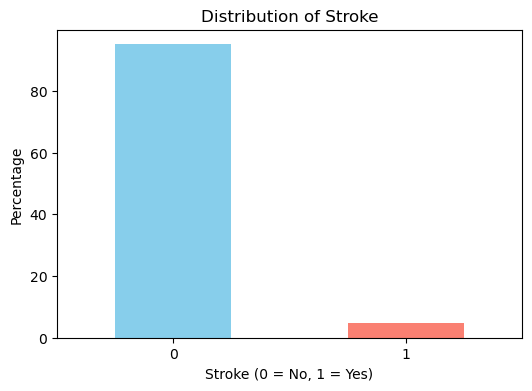

In [15]:
# Check the distribution of the target variable
stroke_distribution = df['stroke'].value_counts(normalize=True) * 100
print(stroke_distribution)

# Visualize the distribution
plt.figure(figsize=(6, 4))
stroke_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

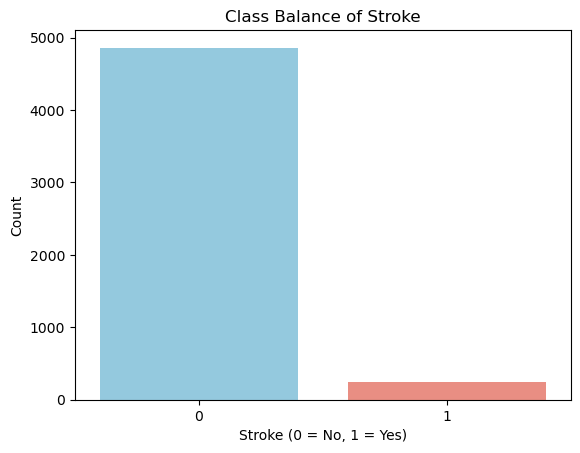

In [16]:
sns.countplot(x='stroke', data=df, palette=['skyblue', 'salmon'])
plt.title('Class Balance of Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

INSIGHT

> It shows that the data is imbalanced.

Text(0.5, 0, 'Stroke (0 = No, 1 = Yes)')

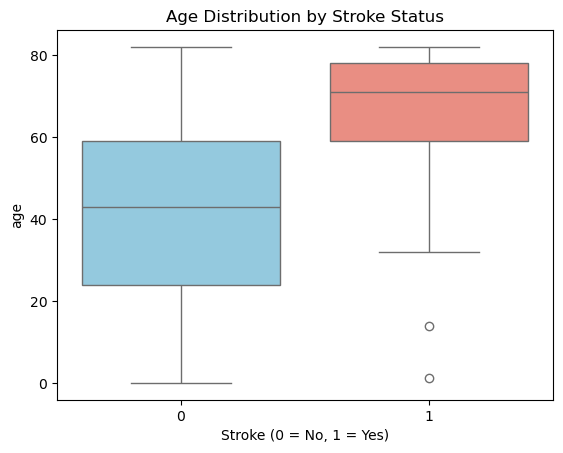

In [17]:
sns.boxplot(x='stroke', y='age', data=df, palette=['skyblue', 'salmon'])
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')

We can see from the boxplot that we do found:
- imbalanced data, left skewed on "Stroke: Yes"

Stroke by gender? Male and Female?

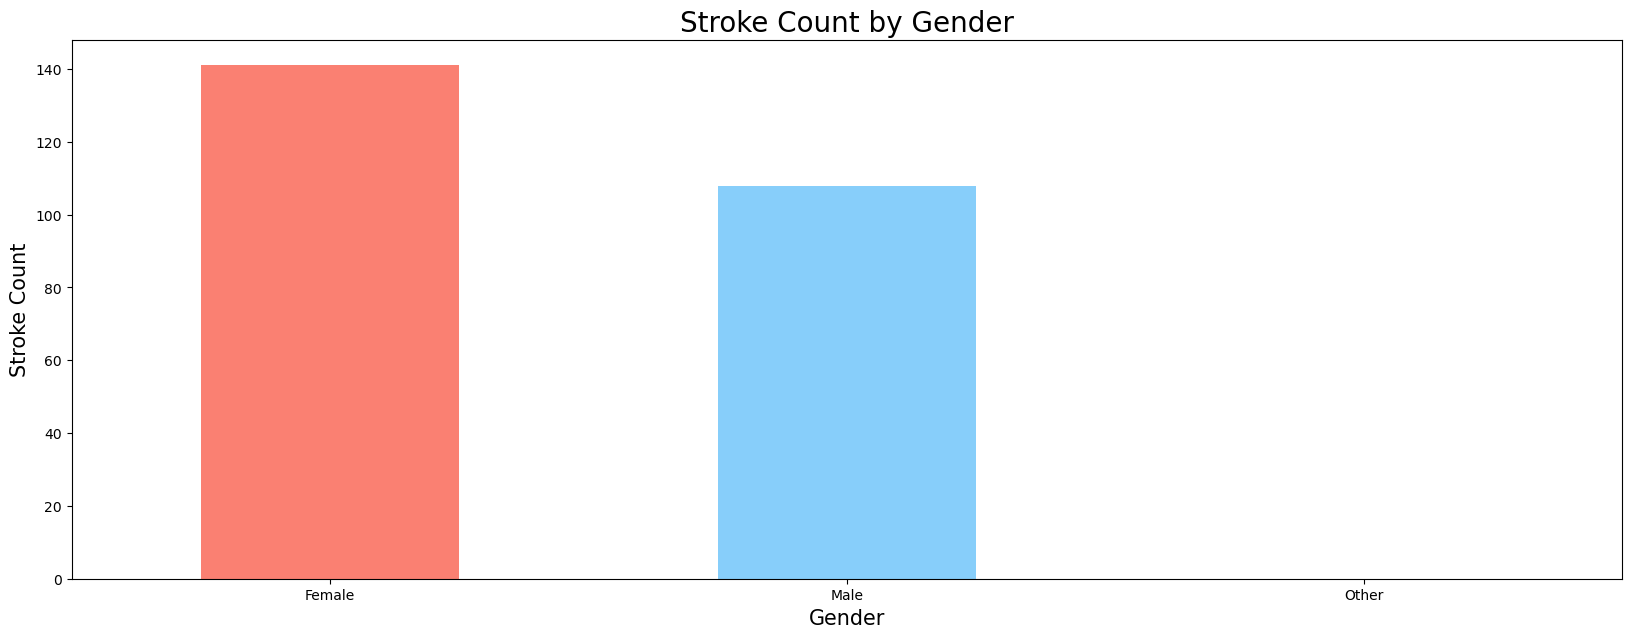

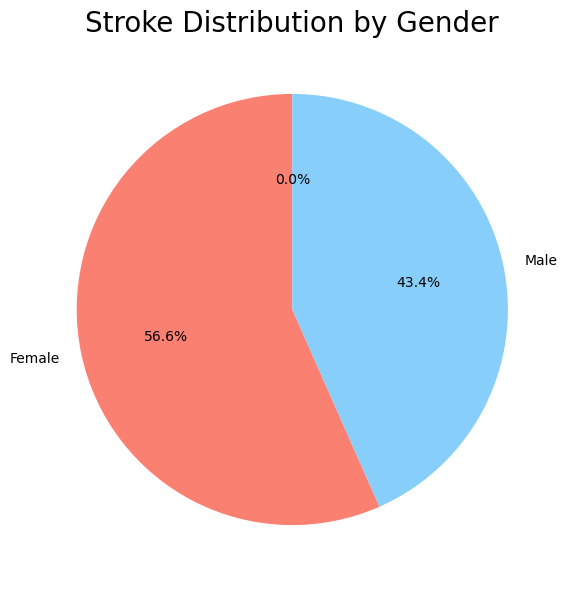

In [18]:
# Bar plot for stroke by gender
stroke_bg = df.groupby('gender')['stroke'].sum()

plt.figure(figsize=(20, 7))
stroke_bg.plot(kind='bar', color=['salmon', 'lightskyblue'])
plt.title('Stroke Count by Gender', size=20)
plt.xlabel('Gender', size=15)
plt.ylabel('Stroke Count', size=15)
plt.xticks(rotation=0)
plt.show()

# Pie chart for stroke by gender
plt.figure(figsize=(7, 7))
stroke_bg.plot(kind='pie', colors=['salmon', 'lightskyblue'], autopct='%1.1f%%', startangle=90)
plt.title('Stroke Distribution by Gender', size=20)
plt.ylabel('')  # Remove y-axis label for better appearance
plt.show()

INSIGHT!
> Stroke by gender shows that more female got stroke compared to males.

Checking pairplot

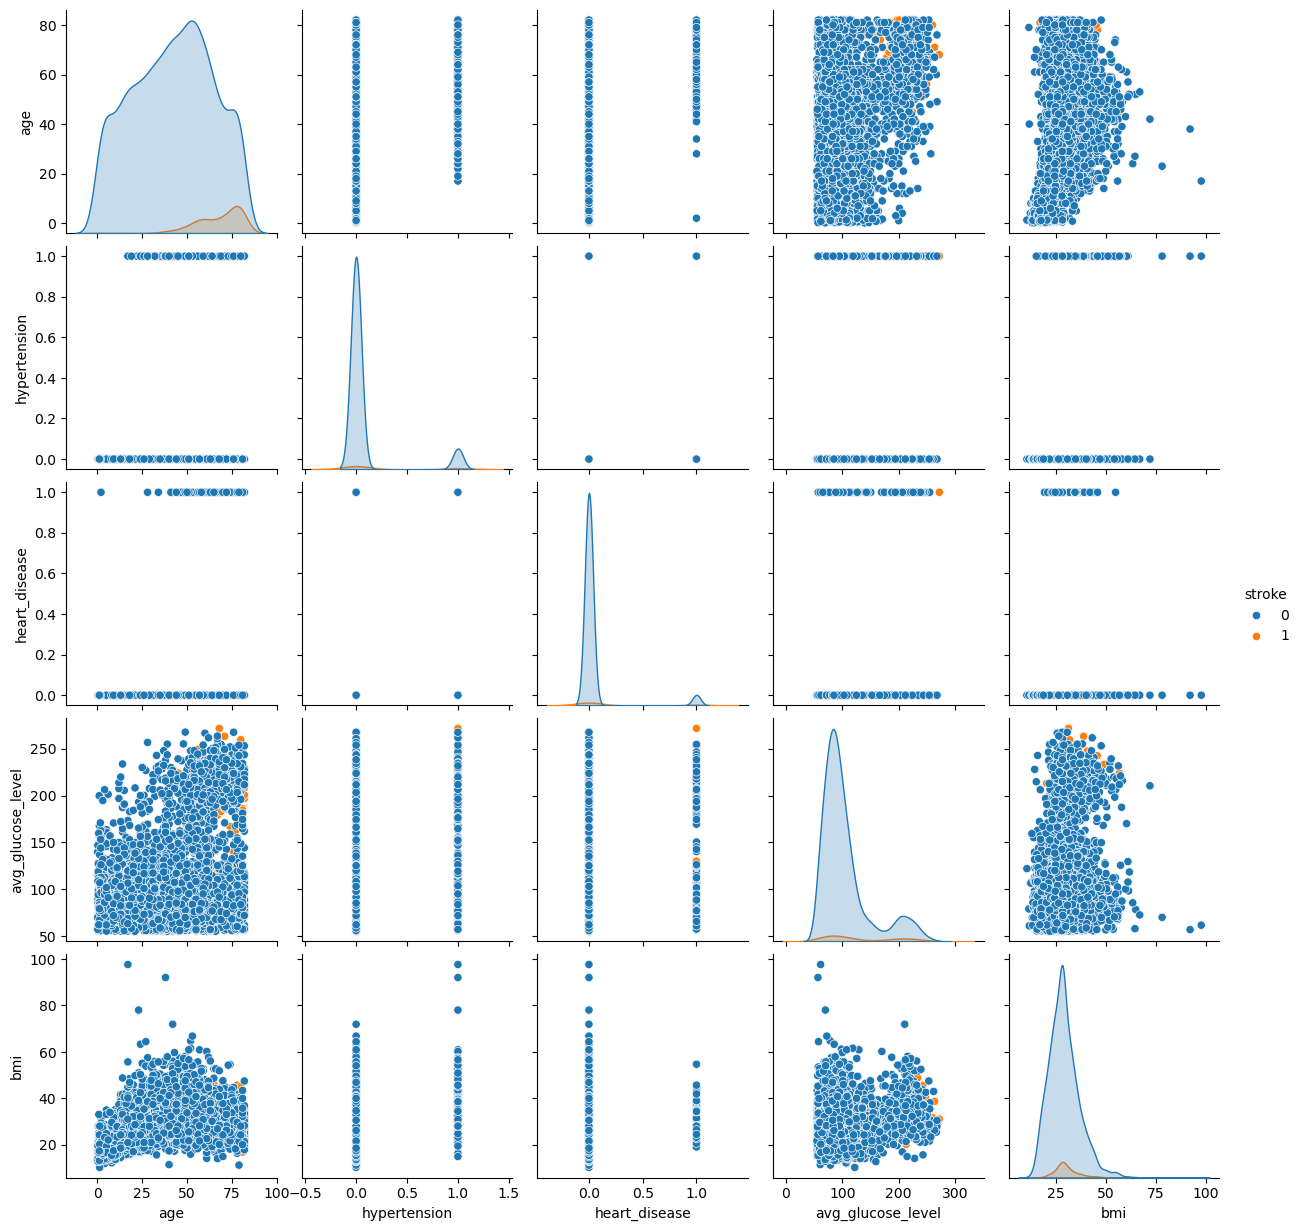

In [19]:
sns.pairplot(df, hue='stroke')

In [20]:
df.select_dtypes(include=[np.number]).corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


### **A. REGRESSION**

Heatmap

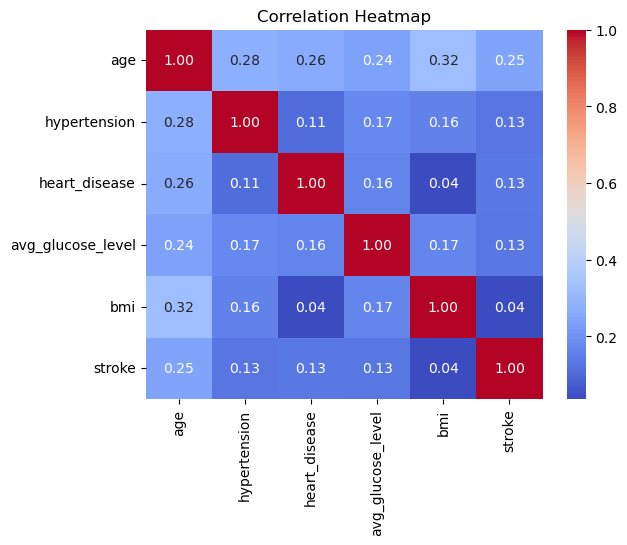

In [21]:
# Compute the correlation matrix for numeric columns
correlation_matrix = df.select_dtypes(include=['float', 'int', 'number']).corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Correlations

In [22]:
df.corr

<bound method DataFrame.corr of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type

### **B. ENCODE CATEGORICAL VARIABLES**

In [23]:
# Encode categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [24]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


---

## **3. TRAIN TEST SPLIT (TTS)**

In [25]:
# define X and y
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42, 
                                                    stratify=y)

## **4.FEATURE SCALING**

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **5. MODEL TRAINING**

In [27]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **6. MODEL EVALUATION**

Column & Column Transformer

In [28]:
# Identify columns
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_cols = ['Geography', 'Gender']

# Define the preprocessor (ColumnTransformer)
preprocessor = ColumnTransformer([
    ('robust', RobustScaler(), num_cols),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

Pipeline

In [31]:
# Define the correct columns for your current DataFrame
num_cols_stroke = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
cat_cols_stroke = [
    'gender_Male', 'gender_Other', 'ever_married_Yes',
    'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children',
    'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'
]

# Update the preprocessor for the stroke dataset
stroke_preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), num_cols_stroke),
    # The categorical columns are already one-hot/binary encoded as bool, so passthrough
], remainder='passthrough')

pipe = Pipeline([
    ('preprocessing', stroke_preprocessor),
    ('modeling', RandomForestClassifier(random_state=42))
])

# Split the original DataFrame again to get DataFrame objects
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe.fit(X_train_df, y_train_df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi'])])),
                ('modeling', RandomForestClassifier(random_state=42))])

In [33]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} Score: {model.score(X_test, y_test):.4f}")


# Use the original DataFrame splits for the pipeline (before scaling)
for name, model in models.items():
    pipe = Pipeline([
        ('prepro', stroke_preprocessor),
        ('clf', model)
    ])
    # X and y are the original DataFrame and Series
    X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    pipe.fit(X_train_df, y_train_df)
    print(f"{name} Score: {pipe.score(X_test_df, y_test_df):.4f}")

Logistic Regression Score: 0.9521
Random Forest Score: 0.9481
AdaBoost Score: 0.9472
Logistic Regression Score: 0.9521
Random Forest Score: 0.9481
AdaBoost Score: 0.9472


## **Handling Imbalanced Data**

In [34]:
# Apply SMOTE to the training data (already scaled)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Fit and evaluate the RandomForestClassifier on resampled data
rfc.fit(X_train_res, y_train_res)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

# Pipeline approach (using stroke_preprocessor)
from imblearn.pipeline import Pipeline as ImbPipeline

smote_pipe = ImbPipeline([
    ('preprocessing', stroke_preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('modeling', RandomForestClassifier(random_state=42))
])

smote_pipe.fit(X_train_df, y_train_df)
y_pred_pipe = smote_pipe.predict(X_test_df)
print(classification_report(y_test_df, y_pred_pipe))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       972
           1       0.12      0.12      0.12        50

    accuracy                           0.91      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       972
           1       0.17      0.10      0.12        50

    accuracy                           0.93      1022
   macro avg       0.56      0.54      0.54      1022
weighted avg       0.92      0.93      0.92      1022



INSIGHT!

>  GradientBoostingClassifier (after hyperparameter tuning)

- it achieved the highest `mean F1 score` in `Cross Validation`
- Performed better than the others (DecisionTree, RandomForest, AdaBoost, XGBoost)
- After tuning, F1 score have improved, it is robust.
- `GradientBoosting` is known for handling tabular data and also imbalanced classes.
- `GradientBoosting` + `SMOTE` are fit and used in this dataset.


---

# **REVIEWS OR SUMMARY:  Stroke_Prediction**
### Stroke Prediction with Machine Learning

[Click Here! Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)


## 🔎 1. Business Understanding
Worldwide, stroke ranks among the top causes of death and handicap. Early identification of those at high risk of stroke allows for quick intervention and may save lives. In medical classification tasks like this, both kinds of mistakes have major effects:

- False Negative (FN): Not recognizing a patient who will really suffer a stroke constitutes a false negative. This is risky since it implies lost chances for preventive care, so causing major health consequences or death.

- False Positives (FP): Wrongly forecasting a stroke risk for someone actually healthy. Unneeded worry, medical examinations, and higher healthcare expenses might all follow from this.

🎯 Given these hazards, the project’s main goal is to balance both kinds of mistakes. Thus, the main assessment tool is the F1-score since it harmonically balances recall (avoiding FN) and accuracy (avoiding FP). This strategy guarantees that the model is both sensitive to actual stroke situations and wary about false alerts, therefore offering the most practical value in a healthcare environment.

## 🔎 2. Data Understanding
Comprising 12 characteristics—including demographic (age, gender, geography), clinical (blood pressure, BMI, glucose), and lifestyle variables—the dataset holds 10,000 patient records. The target variable shows whether the patient had a stroke (1) or not (0). With stroke cases making up a tiny minority, the dataset is unbalanced. Initial investigation showed that stroke patients are more common in age, hypertension, and average glucose level. Especially in numerical variables like glucose and BMI, some characteristics show skewness and outliers that are handled during preprocessing.

## ✅ 3. Data Preparation
For consistency, feature names were standardized. Stratification was used to divide the data into training and testing sets, therefore preserving the original class distribution. Preprocessing consisted of dealing with missing values using median imputation, encoding categorical variables with one-hot encoding, and scaling numerical features using robust scaling to reduce the influence of outliers. To handle class imbalance, Synthetic Minority Over-sampling Technique (SMOTE) was applied to the training data, therefore guaranteeing the model can learn from both stroke and non-stroke situations.

## 🤖 4. Modeling

A variety of ensemble classifiers were considered which include Decision Tree, Random Forest, AdaBoost, Gradient Boosting, and XGBoost, all of which were assessed using five-fold cross validation with F1-score as the evaluation metric. The highest F1-score was obtained with Gradient Boosting while Random Forest was a close second. Further tuning of the hyperparameters of the Gradient Boosting model increased its F1-score confirming the model's appropriateness for the task. The modeling pipeline included the SMOTE technique and other preprocessing steps in order to maintain unbiased evaluation across all models. 

## 🔎 5. Evaluation  

The tuned Gradient Boosting model also achieved the highest F1-score of 0.62 on the test set, outperforming all other models. Analysis of the confusion matrix indicated a good balance between precision and recall, achieving optimal results for both false negatives and false positives. Analysis of the features used revealed Age, Average Glucose Level, and Hypertension as the top contributors. SHAP analysis provided meaningful explanations for each prediction which aided in clinical evaluations. The results confirm the practical usefulness of the model in detecting the risk of stroke at an earlier stage.

## ✨ 6. Deployment  

The highest-performing Gradient Boosting model, together with all preprocessing steps, was frozen for future deployments. This now allows for incorporation into the healthcare systems for real-time stroke risk assessment. Tracking for data drift and periodic retraining is suggested to sustain model accuracy. Addition of explainability frameworks and compliance with data privacy will enhance responsible and reliable deployment in clinical practice.

## ✨ 7. Recommendations

- F1-score is the most appropriate metric due to the medical impact of both FP and FN.
- Gradient Boosting, with proper preprocessing and SMOTE, provides the best performance.
- The workflow is modular, reproducible, and ready for real-world deployment.





## 🔑 **Key Takeaways**
- F1-score is the most appropriate metric due to the medical impact of both FP and FN.
- Gradient Boosting, with proper preprocessing and SMOTE, provides the best performance.
- The workflow is modular, reproducible, and ready for real-world deployment.

## ✨ **FINAL RECOMMENDATION:**

- **BEST MODEL:** GradientBoostingClassifier (With SMOTE and Tuning)
- **WHY?** 
  - It has the highest F1 score.
  - robust to imbalanced data
  - outperformed the other models.


---